# Sharpe Ratio and Portfolio Values

In [8]:
import pandas as pd
from pandas_datareader import data as wb

## Create a Portfolio

In [9]:
aapl = pd.DataFrame(wb.DataReader('AAPL','yahoo', '2012-1-1','2017-1-1')['Adj Close'])
cisco = pd.DataFrame(wb.DataReader('CSCO','yahoo', '2012-1-1','2017-1-1')['Adj Close'])
ibm = pd.DataFrame(wb.DataReader('IBM','yahoo', '2012-1-1','2017-1-1')['Adj Close'])
amzn = pd.DataFrame(wb.DataReader('AMZN','yahoo', '2012-1-1','2017-1-1')['Adj Close'])

In [10]:
#Cummulative Return. Normalizing prices
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [12]:
#The zip is allocating for each df(Making a list of tuples)
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [13]:
aapl.head()

,Adj Close,Normed Return,Allocation
Date,,,
2012-01-03,51.464207,1.000000,0.300000
2012-01-04,51.740776,1.005374,0.301612
2012-01-05,52.315197,1.016536,0.304961
2012-01-06,52.862103,1.027162,0.308149
2012-01-09,52.778248,1.025533,0.307660


## Investment

Let's pretend we invested a million dollars in this portfolio

In [14]:
#Saying we are starting out with $1 million allocated on the percents above for securties
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [15]:
aapl.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,51.464207,1.000000,0.300000,300000.000000
2012-01-04,51.740776,1.005374,0.301612,301612.204195
2012-01-05,52.315197,1.016536,0.304961,304960.672767
2012-01-06,52.862103,1.027162,0.308149,308148.745911
2012-01-09,52.778248,1.025533,0.307660,307659.932342


## Total Portfolio Value

In [17]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],
                ibm['Position Values'],amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.204195,203864.720552,398368.231901,99150.977890
2012-01-05,304960.672767,203113.309854,396478.873908,99206.837860
2012-01-06,308148.745911,202361.848111,391927.093079,101999.665897
2012-01-09,307659.932342,203650.037250,389887.288082,99737.473483


In [18]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.204195,203864.720552,398368.231901,99150.977890,1.002996e+06
2012-01-05,304960.672767,203113.309854,396478.873908,99206.837860,1.003760e+06
2012-01-06,308148.745911,202361.848111,391927.093079,101999.665897,1.004437e+06
2012-01-09,307659.932342,203650.037250,389887.288082,99737.473483,1.000935e+06


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

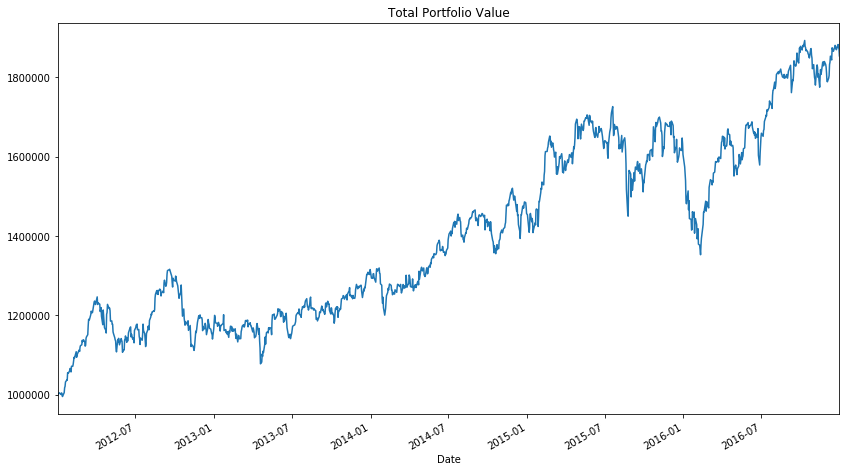

In [20]:
portfolio_val['Total Pos'].plot(figsize=(14,8))
plt.title('Total Portfolio Value')

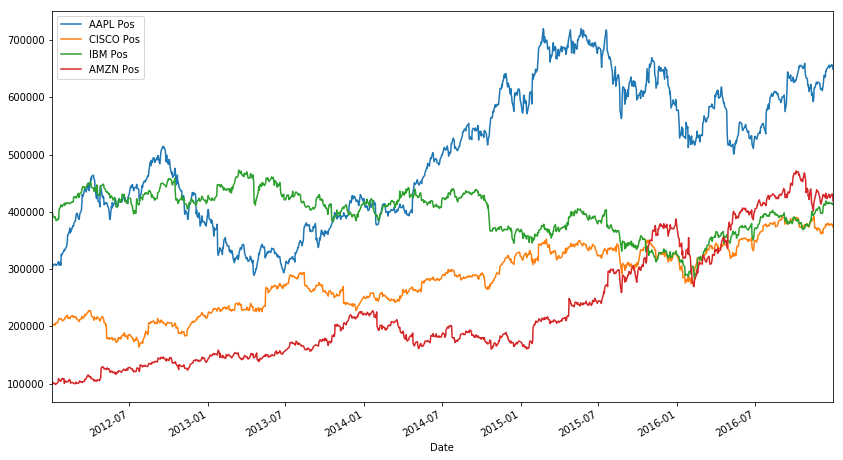

In [21]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(14,8))

# Portfolio Statistics
### Daily Returns

In [22]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Avg Daily Return

In [24]:
portfolio_val['Daily Return'].mean()

0.0005472975864053903

### Std Daily Return

In [25]:
portfolio_val['Daily Return'].std()

0.010570210334046775

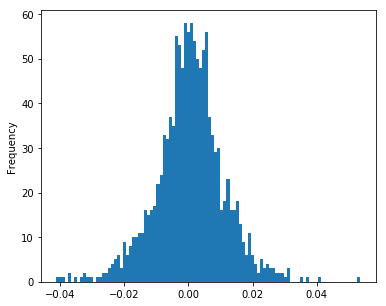

In [27]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100, figsize=(6,5))

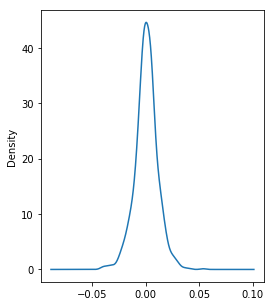

In [30]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

### Cumulative Return

In [23]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 85.45079676507925 was percent!


# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [31]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.05177736006279252

In [ ]:
#Sharp Ratio
# >1 Good
# >2 Very Good
# >3 Excellent

In [32]:
#Since we have daily data, we will analyze our sharp ratio.
ASR = (252**0.5)*SR
ASR

0.8219401096175801